## Project Description 


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

### Data Description

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

- X2: Gender (1 = male; 2 = female).

- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

- X4: Marital status (1 = married; 2 = single; 3 = others).

- X5: Age (year).

- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Source [2]

### Objective of Project

Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by Credit Card Default.

1. How Credit Cards Work? 
- We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

2. Credit Card Default?
- Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

Source [2]

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd 

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data

df = pd.read_csv('UCI_Credit_Card.csv')
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
341,342,50000.0,1,2,2,36,0,0,0,0,...,680.0,978.0,978.0,1212.0,1200.0,0.0,978.0,0.0,0.0,0
12866,12867,20000.0,2,2,2,25,0,0,0,0,...,14253.0,18475.0,13878.0,1376.0,1121.0,460.0,6000.0,624.0,2000.0,0
15206,15207,70000.0,2,3,2,29,0,-1,-1,2,...,24726.0,25377.0,24818.0,24336.0,3010.0,0.0,875.0,600.0,1000.0,0
6548,6549,20000.0,2,1,2,46,0,0,0,0,...,6411.0,3125.0,3164.0,1273.0,1039.0,1000.0,123.0,101.0,48.0,0
13959,13960,130000.0,2,2,1,30,0,0,0,0,...,20783.0,-290.0,-680.0,3000.0,3000.0,2000.0,0.0,0.0,1000.0,0


In [6]:
# Rename the default.payment.next.month column to IsDefaulter
df['IsDefaulter'] = df['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1)

# Descriptive statistics
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,IsDefaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000


## Data Exploration

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

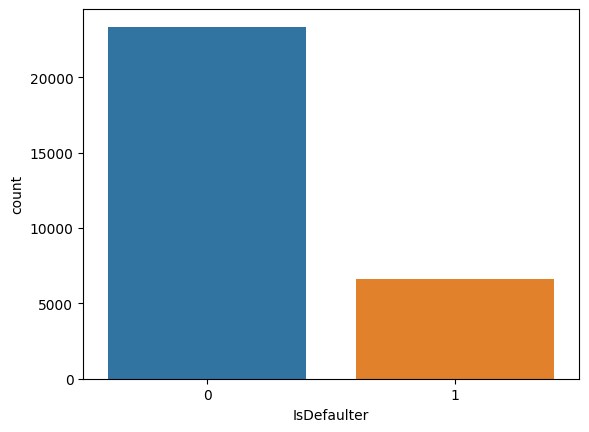

In [23]:
# Exploring the IsDefaulter column

sns.countplot(x = 'IsDefaulter', data = df)
df['IsDefaulter'].value_counts()

# We observe that both classes are not in proportion and we have imbalanced dataset.

### Categorical Variables

That are Sex, Marriage, Education. We want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our models.

In [21]:
# Categgorical Variable - SEX

# 1 - Male
# 2 - Female

df['SEX'].value_counts()
# There are more females than males in the dataset

SEX
2    18112
1    11888
Name: count, dtype: int64

In [19]:
# Categgorical Variable - Marriage

# 1 - married
# 2 - single 
# 3 - others

df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [15]:
# We have few values for 0, which are not determined .so we adding them in Others category.
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE'>

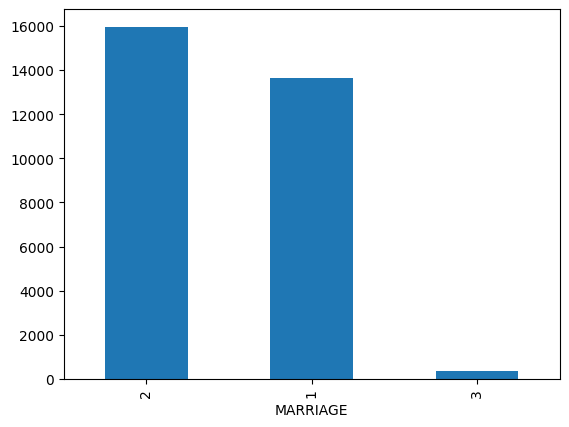

In [18]:
df.MARRIAGE.value_counts().plot(kind = 'bar')

In [22]:
# Categgorical Variable - Education

# 1 = graduate school
# 2 = university
# 3 = high school
# 4 = others

df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [17]:
# As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

#### Observations - Categorical Varaibles

- There are more females credit card holder,so no. of defaulter have high proportion of females.
- No. of defaulters have a higher proportion of educated people (graduate school and university)
- No. of defaulters have a higher proportion of Singles.

### Numerical Variables

That are Limit Balance, Age, Bill Amount, History Payment Status, Paid Amount. 

In [25]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

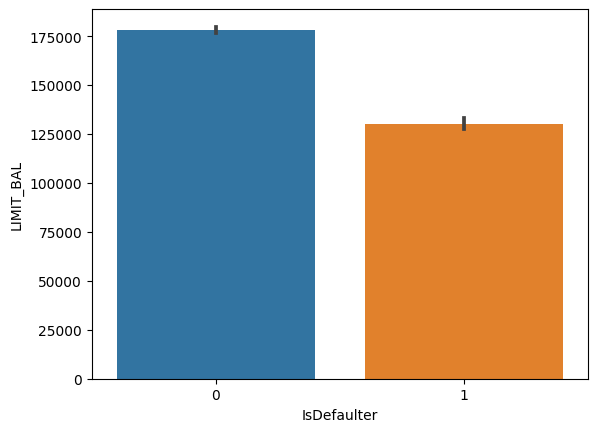

In [36]:
# Numerical Variable - Limit Balance
# df.LIMIT_BAL.hist(bins = 20)
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

<Axes: >

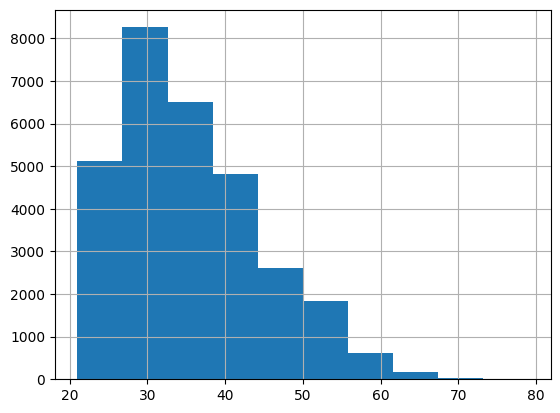

In [27]:
# Numerical Variable - Age
df.AGE.hist()

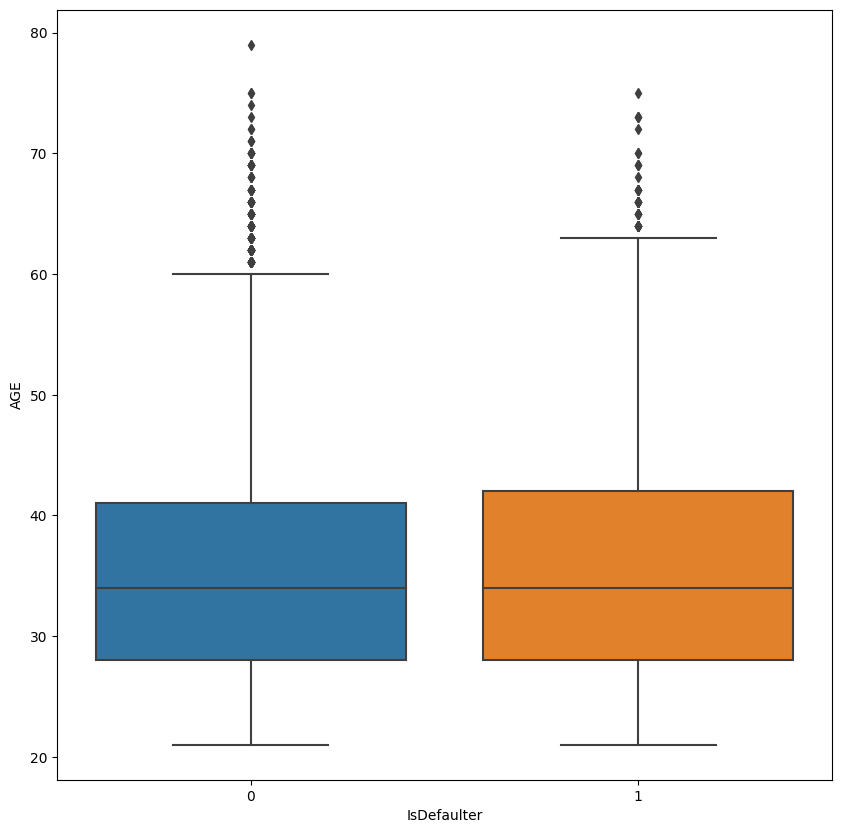

In [37]:
df.groupby('IsDefaulter')['AGE'].mean()
df = df.astype('int')
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

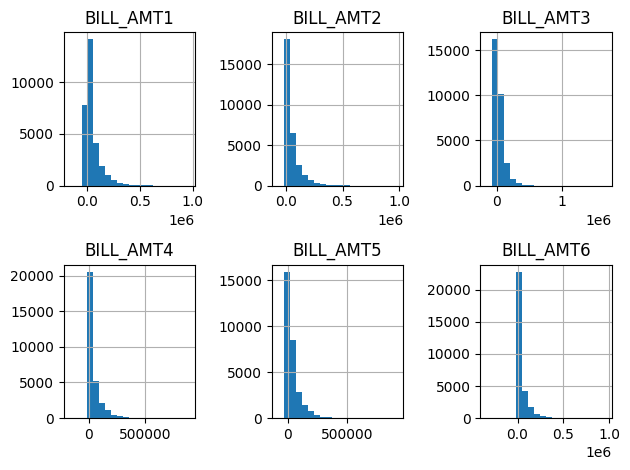

In [26]:
# Numerical Variable - Bill Amount

bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

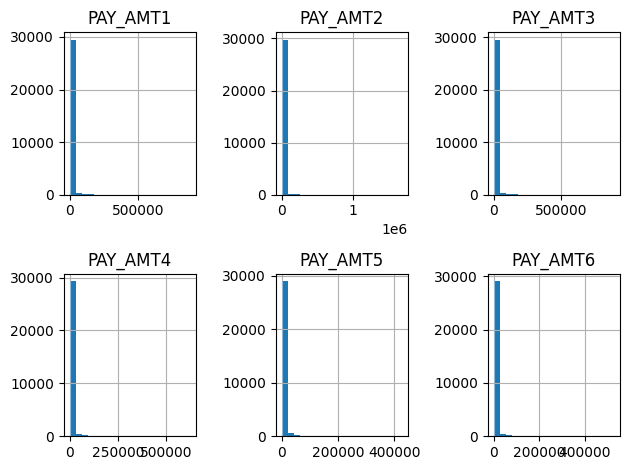

In [29]:
# Numerical Variable - Paid Amount
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

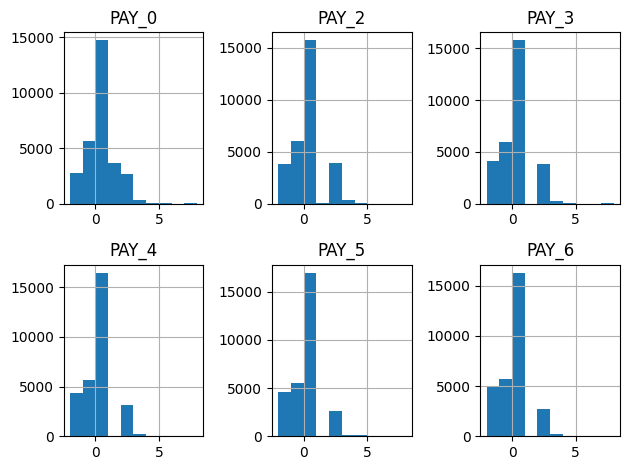

In [32]:

late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

# this is probably more of a category

### Sources
1. https://www.kaggle.com/code/lucabasa/credit-card-default-a-very-pedagogical-notebook 
2. https://www.kaggle.com/code/bansodesandeep/credit-card-default-prediction 